One of the important objectives of government or private entity working on health sector is to improve the overall health and well being of the people. In order to achive those objective, it is essential to understand the mortality data and the cause leading to it. As the data shows, one of the leading causes of death is cardio-vascular diseases. The following data[1] shows number of deaths for leading causes of death:

    Heart disease: 659,041
    Cancer: 599,601
    Accidents (unintentional injuries): 173,040
    Chronic lower respiratory diseases: 156,979
    Stroke (cerebrovascular diseases): 150,005
    Alzheimer’s disease: 121,499
    Diabetes: 87,647
    Nephritis, nephrotic syndrome, and nephrosis: 51,565
    Influenza and Pneumonia: 49,783
    Intentional self-harm (suicide): 47,511
Institutions  frequently report the mortality data and by analyzing these data one can diagonize the problem and devise  policy or strategies to overcome those problems. As we can see the leading causes of death is heart disease and understanding the underlying causes and mitigating those problems can significantly lead to the higher life expentancy. To properly understand the problem related various causes of death, one need to do proper analysis of the data. 

# Primary Goals:
   1. Itentifying the mortality rate and the underlying cause of the death in different US states
   2. Study the correlation between various factors (eg. lack of insurance, lack of preventive care, lack of hospital, lack of health education) and the cause of the death
   
# From Business Perspective:
   As we are able to understand the other factors leading to the death(or disease), we will be to develop proper business model to address such issues. Some of the business strategies can be
   1. Providing access to the new fitness center as affordable price.
   2. Providing health insurace to cover more uninsured people
   3. Developing new infrastructure for providing affordable health care
   4. Develop programs to educate people on how to maitain proper hygiene, food habits.
   5. For child/infant mortality rate, we can correlate if socio-economic has any impact in higher mortality rate and can develop business model to address that.
 
 ## Data Sources:
     [1] https://data.cdc.gov/NCHS/Weekly-counts-of-death-by-jurisdiction-and-cause-o/u6jv-9ijr


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [3]:
df = pd.read_csv('Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2020-2021.csv')

## Data Processing and Filtering

In [4]:
df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,United States,2020,1,2020-01-04,60180.0,55020.0,846.0,11568.0,1828.0,2531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2020,2,2020-01-11,60721.0,55734.0,866.0,11961.0,1942.0,2565.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2020,3,2020-01-18,59361.0,54525.0,831.0,11703.0,1819.0,2490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2020,4,2020-01-25,59151.0,54400.0,830.0,11879.0,1861.0,2516.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2020,5,2020-02-01,58830.0,54009.0,813.0,11962.0,1828.0,2477.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail(5)

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
3559,Puerto Rico,2021,9,2021-03-06,64.0,63.0,0.0,NaN,NaN,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN
3560,Puerto Rico,2021,10,2021-03-13,39.0,37.0,0.0,NaN,NaN,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,NaN
3561,Puerto Rico,2021,11,2021-03-20,87.0,71.0,NaN,NaN,12.0,0.0,...,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN
3562,Puerto Rico,2021,12,2021-03-27,78.0,66.0,0.0,NaN,16.0,NaN,...,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),Suppressed (counts 1-9)
3563,Puerto Rico,2021,13,2021-04-03,93.0,77.0,0.0,NaN,21.0,0.0,...,NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN


In [5]:
df.keys()

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'flag_otherunk', 

In [8]:
#drop columns that lack data or not important for our analysis
to_drop_cols = list(df.keys()[19:])

In [9]:
to_drop_cols

['flag_allcause',
 'flag_natcause',
 'flag_sept',
 'flag_neopl',
 'flag_diab',
 'flag_alz',
 'flag_inflpn',
 'flag_clrd',
 'flag_otherresp',
 'flag_nephr',
 'flag_otherunk',
 'flag_hd',
 'flag_stroke',
 'flag_cov19mcod',
 'flag_cov19ucod']

In [10]:
df.drop(columns=to_drop_cols,inplace=True)

In [11]:
df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,United States,2020,1,2020-01-04,60180.0,55020.0,846.0,11568.0,1828.0,2531.0,1561.0,3503.0,1066.0,1094.0,653.0,14206.0,3109.0,0.0,0.0
1,United States,2020,2,2020-01-11,60721.0,55734.0,866.0,11961.0,1942.0,2565.0,1530.0,3707.0,1036.0,1093.0,659.0,13908.0,3185.0,0.0,0.0
2,United States,2020,3,2020-01-18,59361.0,54525.0,831.0,11703.0,1819.0,2490.0,1485.0,3526.0,993.0,1123.0,638.0,13592.0,3258.0,3.0,2.0
3,United States,2020,4,2020-01-25,59151.0,54400.0,830.0,11879.0,1861.0,2516.0,1487.0,3400.0,978.0,1109.0,669.0,13605.0,3182.0,1.0,1.0
4,United States,2020,5,2020-02-01,58830.0,54009.0,813.0,11962.0,1828.0,2477.0,1418.0,3313.0,980.0,1072.0,644.0,13465.0,3080.0,0.0,0.0


In [13]:
df['Jurisdiction of Occurrence'].value_counts()

Michigan                66
South Carolina          66
New York City           66
Maine                   66
Kansas                  66
Rhode Island            66
Arkansas                66
New Jersey              66
Nebraska                66
Oklahoma                66
Florida                 66
Vermont                 66
Colorado                66
Tennessee               66
New Mexico              66
Montana                 66
Maryland                66
Alaska                  66
South Dakota            66
Alabama                 66
Mississippi             66
Georgia                 66
Iowa                    66
Texas                   66
United States           66
North Dakota            66
Wyoming                 66
Wisconsin               66
Indiana                 66
Nevada                  66
Connecticut             66
North Carolina          66
Missouri                66
New Hampshire           66
Pennsylvania            66
District of Columbia    66
Delaware                66
V

In [14]:
df['MMWR Year'].unique()

array([2020, 2021], dtype=int64)

In [15]:
#Remove the data from 2021 and we focus on analyzing data from 2020 at the moment
df = df[df['MMWR Year'] != 2021]

In [16]:
df.tail()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
3546,Puerto Rico,2020,49,2020-12-05,665.0,638.0,14.0,98.0,60.0,58.0,11.0,34.0,NaN,13.0,18.0,88.0,34.0,101.0,88.0
3547,Puerto Rico,2020,50,2020-12-12,653.0,631.0,18.0,101.0,50.0,37.0,19.0,24.0,NaN,16.0,15.0,113.0,24.0,111.0,98.0
3548,Puerto Rico,2020,51,2020-12-19,671.0,638.0,10.0,99.0,58.0,50.0,NaN,22.0,10.0,25.0,23.0,106.0,18.0,107.0,95.0
3549,Puerto Rico,2020,52,2020-12-26,608.0,575.0,17.0,69.0,53.0,43.0,20.0,27.0,NaN,17.0,13.0,96.0,20.0,90.0,68.0
3550,Puerto Rico,2020,53,2021-01-02,455.0,441.0,10.0,63.0,50.0,36.0,NaN,17.0,NaN,15.0,12.0,62.0,16.0,68.0,63.0


In [17]:
df['Jurisdiction of Occurrence'].value_counts()

Michigan                53
South Carolina          53
New York City           53
Maine                   53
Kansas                  53
Rhode Island            53
Arkansas                53
New Jersey              53
Nebraska                53
Oklahoma                53
Florida                 53
Vermont                 53
Colorado                53
Tennessee               53
New Mexico              53
Montana                 53
Maryland                53
Alaska                  53
South Dakota            53
Alabama                 53
Mississippi             53
Georgia                 53
Iowa                    53
Texas                   53
United States           53
North Dakota            53
Wyoming                 53
Wisconsin               53
Indiana                 53
Nevada                  53
Connecticut             53
North Carolina          53
Missouri                53
New Hampshire           53
Pennsylvania            53
District of Columbia    53
Delaware                53
V

In [18]:
#Lets create state abbreviation for future use
us_state_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC','Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY','Puerto Rico': 'PR'}
x = list(us_state_abbrev.values())

In [20]:
#define columns that have death data from different cause
cause_cols = list(df.keys())[4:]

In [21]:
cause_cols

['All Cause',
 'Natural Cause',
 'Septicemia (A40-A41)',
 'Malignant neoplasms (C00-C97)',
 'Diabetes mellitus (E10-E14)',
 'Alzheimer disease (G30)',
 'Influenza and pneumonia (J09-J18)',
 'Chronic lower respiratory diseases (J40-J47)',
 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
 'Diseases of heart (I00-I09,I11,I13,I20-I51)',
 'Cerebrovascular diseases (I60-I69)',
 'COVID-19 (U071, Multiple Cause of Death)',
 'COVID-19 (U071, Underlying Cause of Death)']

In [22]:
df_groups = df.groupby(by='Jurisdiction of Occurrence',as_index=False)[cause_cols].sum()

In [23]:
#As we analyze state data only, lets drop US and New York City Data
df_groups = df_groups[df_groups['Jurisdiction of Occurrence'] != 'New York City']
df_groups = df_groups[df_groups['Jurisdiction of Occurrence'] != 'United States']

In [31]:
labels = list(us_state_abbrev.values())
to_plot = list(df.keys())[4:]

In [32]:
to_plot

['All Cause',
 'Natural Cause',
 'Septicemia (A40-A41)',
 'Malignant neoplasms (C00-C97)',
 'Diabetes mellitus (E10-E14)',
 'Alzheimer disease (G30)',
 'Influenza and pneumonia (J09-J18)',
 'Chronic lower respiratory diseases (J40-J47)',
 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
 'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
 'Diseases of heart (I00-I09,I11,I13,I20-I51)',
 'Cerebrovascular diseases (I60-I69)',
 'COVID-19 (U071, Multiple Cause of Death)',
 'COVID-19 (U071, Underlying Cause of Death)']

In [33]:
df_groups1 = df_groups[to_plot].cumsum(axis=1)

In [34]:
df_groups1.head()

,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,64314.0,124098.0,125101.0,135523.0,136950.0,140050.0,141148.0,144581.0,145536.0,146596.0,147810.0,162562.0,165879.0,172668.0,179021.0
1,5060.0,9334.0,9334.0,10314.0,10314.0,10314.0,10314.0,10314.0,10314.0,10314.0,10314.0,11197.0,11208.0,11387.0,11528.0
2,78227.0,148517.0,148714.0,161817.0,164427.0,167742.0,168899.0,172686.0,173825.0,174608.0,175808.0,190497.0,193787.0,203333.0,212123.0
3,38368.0,73881.0,74200.0,80707.0,82043.0,83859.0,84481.0,86942.0,87206.0,87863.0,87920.0,96587.0,98265.0,102353.0,105947.0
4,326238.0,626951.0,628716.0,689625.0,701473.0,720582.0,726756.0,739850.0,742814.0,747299.0,750359.0,817880.0,836112.0,870725.0,903140.0


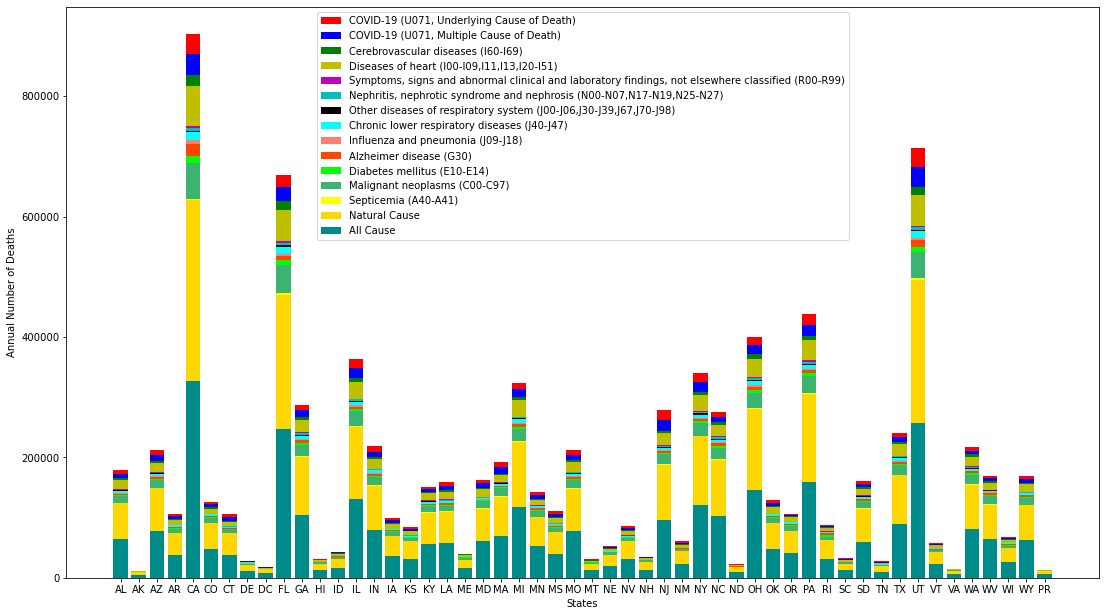

In [35]:
clist = ['r', 'b','g','y','m','c', 'black','aqua', 'salmon', 'orangered', 'lime', 'mediumseagreen', 'yellow', 'gold', 'darkcyan', 'lime', 'magenta', 'grey', 'mediumslateblue', 'dimgray', 'deeppink', 'firebrick', 'pink', 'deepskyblue', 'olive', 'greenyellow', 'thistle', 'springgreen']
ct = 0
for i in to_plot[::-1]:
    plt.bar(labels,df_groups1[i],color=clist[ct],label=i)
    ct += 1
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)    
plt.xlabel("States")
plt.ylabel("Annual Number of Deaths")
plt.legend()    


The stacked bar chart for total number of death due to various causes.

In [36]:
df_cumulative = df[to_plot].sum() * 100 / df[to_plot].sum().sum()

In [37]:
df_cumulative

All Cause                                                                                            36.450282
Natural Cause                                                                                        33.437297
Septicemia (A40-A41)                                                                                  0.408558
Malignant neoplasms (C00-C97)                                                                         6.478456
Diabetes mellitus (E10-E14)                                                                           1.092509
Alzheimer disease (G30)                                                                               1.437963
Influenza and pneumonia (J09-J18)                                                                     0.556986
Chronic lower respiratory diseases (J40-J47)                                                          1.629562
Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)                                    0.459773
N

In [38]:
#lets merge anything less than 2% to single category -- namely 'other'
others = df_cumulative [df_cumulative < 2].sum()
df_cumulative = df_cumulative[df_cumulative >=2 ]
df_cumulative['others'] = others

In [39]:
df_cumulative

All Cause                                      36.450282
Natural Cause                                  33.437297
Malignant neoplasms (C00-C97)                   6.478456
Diseases of heart (I00-I09,I11,I13,I20-I51)     7.494786
COVID-19 (U071, Multiple Cause of Death)        4.119829
COVID-19 (U071, Underlying Cause of Death)      3.760627
others                                          8.258723
dtype: float64

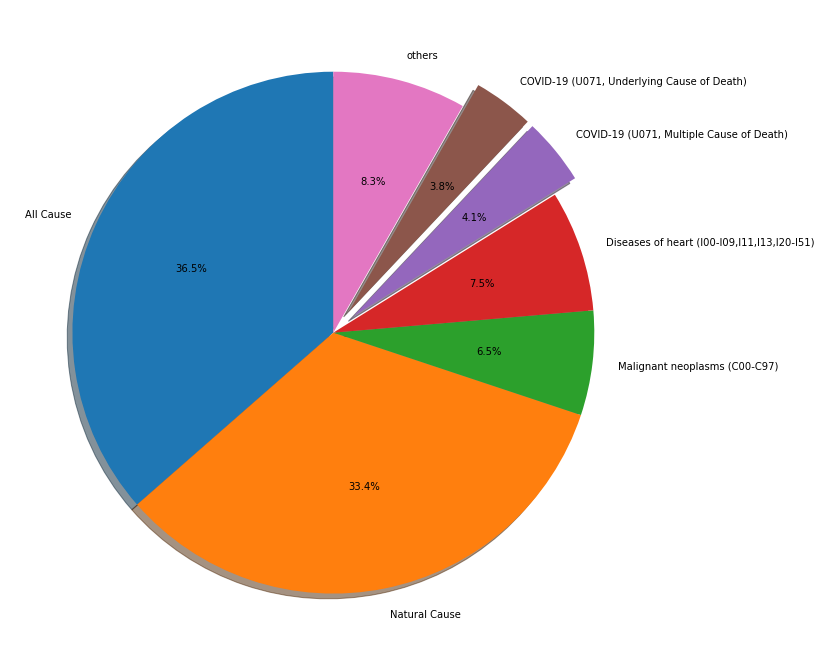

In [41]:
labels = list(df_cumulative.keys())
sizes = list(df_cumulative)
explode = [0, 0, 0, 0, 0.1, 0.1, 0]
fig1, ax1 = plt.subplots()
patches, text, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
fig1.set_size_inches(12,12)
[i.set_fontsize(10) for i in text]
plt.show()

The pie diagram show the ....

In [42]:
#further analysis can be done for subsequent subset of datasets
df_new = pd.read_csv('Weekly_counts_of_deaths_by_jurisdiction_and_race_and_Hispanic_origin.csv')

In [43]:
df_new.head()

,Jurisdiction,Week Ending Date,State Abbreviation,MMWRYear,MMWRWeek,Race/Ethnicity,Time Period,Suppress,Note,Outcome,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,01/11/2014,AL,2014,2,Hispanic,2014,Suppressed (counts <10),NaN,All Cause,NaN,NaN,NaN,NaN,Predicted (weighted)
1,Alabama,01/18/2014,AL,2014,3,Hispanic,2014,NaN,NaN,All Cause,10.0,10.0,NaN,NaN,Predicted (weighted)
2,Alabama,01/25/2014,AL,2014,4,Hispanic,2014,Suppressed (counts <10),NaN,All Cause,NaN,NaN,NaN,NaN,Predicted (weighted)
3,Alabama,02/01/2014,AL,2014,5,Hispanic,2014,NaN,NaN,All Cause,10.0,10.0,NaN,NaN,Predicted (weighted)
4,Alabama,02/08/2014,AL,2014,6,Hispanic,2014,Suppressed (counts <10),NaN,All Cause,NaN,NaN,NaN,NaN,Predicted (weighted)


In [45]:
df_new.tail()

,Jurisdiction,Week Ending Date,State Abbreviation,MMWRYear,MMWRWeek,Race/Ethnicity,Time Period,Suppress,Note,Outcome,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
736735,Wyoming,03/13/2021,WY,2021,10,Other,2021,Suppressed (counts <10),Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted
736736,Wyoming,03/20/2021,WY,2021,11,Other,2021,Suppressed (counts <10),Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted
736737,Wyoming,03/27/2021,WY,2021,12,Other,2021,Suppressed (counts <10),Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted
736738,Wyoming,04/03/2021,WY,2021,13,Other,2021,Suppressed (counts <10),Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted
736739,Wyoming,01/09/2021,WY,2021,1,Other,2021,Suppressed (counts <10),Data in recent weeks are incomplete. Only 60% ...,COVID-19,NaN,NaN,NaN,NaN,Unweighted


# Futher Analysis:
   1. Understanding correlation between age-groups and cause of death
   2. Understanding correlation between race and cause of death
   3. Understanding correlation between socio-economic status and cause of death
   4. Studying drug/alcohol related death and how to prevent it.

# References

[1] https://www.cdc.gov/nchs/products/databriefs/db395.htm